In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio
import plotly.graph_objs as go
from plotly.offline import plot

#For offline plotting services
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [3]:
tesla = pd.read_csv('tesla.csv')
tesla.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
1,2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2,2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
3,2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
4,2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222
5,2010-07-07,3.326,2.996,3.280,3.160,34608500.0,3.160
6,2010-07-08,3.504,3.114,3.228,3.492,38557000.0,3.492
7,2010-07-09,3.580,3.310,3.516,3.480,20253000.0,3.480
8,2010-07-12,3.614,3.400,3.590,3.410,11012500.0,3.410
9,2010-07-13,3.728,3.380,3.478,3.628,13400500.0,3.628


In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2626 entries, 0 to 2625
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2626 non-null   object 
 1   High       2626 non-null   float64
 2   Low        2626 non-null   float64
 3   Open       2626 non-null   float64
 4   Close      2626 non-null   float64
 5   Volume     2626 non-null   float64
 6   Adj Close  2626 non-null   float64
dtypes: float64(6), object(1)
memory usage: 143.7+ KB


In [5]:
tesla['Date'] = pd.to_datetime(tesla['Date'])
# tesla['Date']

In [6]:
print(f'Data frame have the stock prices between {tesla.Date.min()} to {tesla.Date.max()}')
print(f'Total Days = {(tesla.Date.max() - tesla.Date.min()).days} Days')

Data frame have the stock prices between 2010-06-29 00:00:00 to 2020-12-01 00:00:00
Total Days = 3808 Days


In [7]:
tesla.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2626.000000,2626.000000,2626.000000,2626.000000,2.626000e+03,2626.000000
mean,57.408107,54.888605,56.178074,56.204830,3.052144e+07,56.204830
std,80.116269,75.650344,77.983572,78.028651,2.832719e+07,78.028651
min,3.326000,2.996000,3.228000,3.160000,5.925000e+05,3.160000
25%,7.551500,7.256500,7.331000,7.376500,1.060025e+07,7.376500
50%,45.034000,43.619999,44.373999,44.206001,2.399300e+07,44.206001
75%,61.365999,59.072501,60.202999,60.273499,3.938762e+07,60.273499
max,607.799988,578.450012,602.210022,585.760010,3.046940e+08,585.760010


<AxesSubplot:>

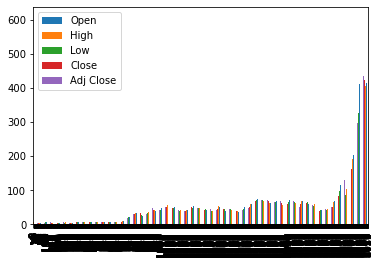

In [8]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='bar')

# Setting the Layout for our plot

In [9]:
layout = go.Layout(
    title='Stock Price',
    xaxis=dict(
        title='Date', 
        titlefont=dict(
            family = 'Courier New, monospace', 
            size=18, 
            color='#7f7f7f'
        )
    ),
    yaxis= dict(
        title = 'Price',
        titlefont=dict(
            family='Courier New, monospace', 
            size=17, 
            color='#7f7f7f'
        )
    )
)
tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data,layout=layout)

In [10]:
iplot(plot)

# Building the regression model

In [91]:
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [92]:
#Split the data into train and test sets
X=np.array(tesla.index).reshape(-1,1)
Y=tesla['Close']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

In [93]:
#Feature scaling
scaler = StandardScaler().fit(x_train)

In [94]:
from sklearn.linear_model import LinearRegression

In [96]:
#Creating a Linear model
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [100]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = x_train.T[0], 
    y=y_train, 
    mode='markers',
    name = 'Actual'
)
trace1=go.Scatter(
    x = x_train.T[0], 
    y=lm.predict(x_train).T, 
    mode='lines', 
    name = 'Predicted'
)
tesla_data = [trace0, trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data = tesla_data, layout=layout)

In [102]:
iplot(plot2)

In [108]:
#Model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train, lm.predict(x_train))}\t{r2_score(y_test, lm.predict(x_test))}
{'MSE'.ljust(10)}{mse(y_train, lm.predict(x_train))}\t{mse(y_test, lm.predict(x_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.39336983789258617	0.3865170742816343
MSE       3853.767505236097	3065.520624764867

